<a href="https://colab.research.google.com/github/Falhebshi/Data-Mining/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**[1] Problem**
The purpose of this project is to analyze and predict the productivity of garment factory employees using data mining techniques. The main goal is to classify whether employees can achieve their target productivity and to cluster employees based on similar productivity patterns. By applying classification and clustering techniques, we aim to analyze employees' data, predict their likelihood of meeting productivity targets, and understand different productivity patterns based on shared characteristics.


#**[2] Data Mining Task**

## Classification:



For classification, the model will be trained to predict whether an employee meets their targeted productivity using attributes such as working hours, experience, overtime, incentives, and other relevant factors. The goal is to identify employees who will likely meet their productivity targets based on their characteristics.

## Clustering:

For clustering, the model will group employees with similar productivity patterns. These clusters will be used to predict results for new employees based on the group they are most similar to, helping better manage employee performance.

#**[3] Data**

## Dataset Overview
Exploratory analysis in Phase 1 and Phase 2 focused on understanding the structure, distribution, and quality of the Garment Worker Productivity dataset. The dataset contains 1,197 observations and includes operational, temporal, and productivity-related attributes, with actual_productivity serving as the main variable of interest.
## Distribution and Summary Statistics

Phase 1 and 2 analysis showed that several numerical features—such as wip, over_time, idle_time, and smv—were skewed with noticeable extreme values. Histograms, boxplots, and five-number summaries confirmed that these variables had long right tails, indicating the need for normalization before clustering.

actual_productivity itself was concentrated mostly between 0.3 and 0.8, which helped guide later decisions for classification (discretizing it) and clustering.

## Relationships Between Variables

Scatter plots and correlation analysis highlighted several meaningful patterns:

- smv and wip showed a positive relationship.

- Higher idle_time was generally associated with lower productivity.

These observations supported the selection of relevant numeric features for clustering.

## Summary

The EDA revealed important characteristics of the dataset, including skewed distributions, meaningful correlations, and overall good data quality. These findings guided the preprocessing choices and feature selection strategies used in Phase 3.

In [119]:
import pandas as pd

In [120]:
df=pd.read_csv('/Raw_dataset.csv')

In [121]:
print('Number of rows',df.shape[0])   #num of rows
print('Number of columns',df.shape[1]) #num of columns

Number of rows 1197
Number of columns 15


In [122]:
print(df.dtypes) #data types of attributes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [123]:
df['categorized_label'] = df['actual_productivity']
num_bins = 3

df['Label'] = pd.cut(df['actual_productivity'], bins=num_bins, labels=['Low   ','Medium', 'High  '])
print('----------------------\nnum -- Class Labels --\n----------------------')
print(df['Label'])
print('-------------------------------------------------------')

print('-------------------------------------------------------')
print('Number of instances for each label:') #print the count of instances(rows) for each label
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(df['Label'].value_counts())
print('-------------------------------------------------------')

----------------------
num -- Class Labels --
----------------------
0       High  
1       High  
2       Medium
3       Medium
4       Medium
         ...  
1192    Medium
1193    Medium
1194    Medium
1195    Low   
1196    Low   
Name: Label, Length: 1197, dtype: category
Categories (3, object): ['Low   ' < 'Medium' < 'High  ']
-------------------------------------------------------
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
Label
Medium    691
High      344
Low       162
Name: count, dtype: int64
-------------------------------------------------------


In [124]:
df.head()  #sample of raw dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,categorized_label,Label
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.886500,High
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.800570,Medium
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.800570,Medium
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.800382,Medium


#**[4] Data Preprocessing**
## Preprocessing from Phase 2

The following preprocessing steps were completed in Phase 2:

- Data Cleaning:
Checked for inconsistencies, formatting issues, and invalid category values. Department names and related fields were standardized.

- Missing Values:
Only the wip feature had missing entries, which were imputed using the median to avoid losing data.

- Outlier & Distribution Analysis:
Numerical features (wip, over_time, idle_time, smv) showed skewness and extreme values. Outliers were not removed, as they represent real production conditions, but handled later through scaling.

- Initial Validation:
Verified numeric ranges and ensured no structural or duplicated data issues.


---


## Additional Preprocessing for Phase 3

### **For Classification**
- Encoded categorical attributes (e.g., department, team) using Label Encoding.

- Prepared the target variable for classification.

- Created multiple train/test splits (90/10, 80/20, 70/30) for comparison.

###**For Clustering**

- Selected only numeric operational features for K-Means:
smv, over_time, wip, incentive, idle_time.

- Applied StandardScaler to normalize all clustering features, ensuring equal contribution to distance calculations and improving cluster separation.

In [125]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


df = pd.read_csv('/Raw_dataset.csv')
#df = pd.read_csv('Raw_data.csv')
df = pd.DataFrame(df)

# --- Make a copy of the raw dataset to keep it unedited ---
Preprocessed_dataset = df.copy()

In [126]:
# --- Have a look at the domains for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nOriginal values in {col}:")
    print(df[col].unique())


Original values in department:
['sweing' 'finishing ' 'finishing']

Original values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Original values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [127]:
# --- Correct department name typos ---
Preprocessed_dataset['department'] = Preprocessed_dataset['department'].replace({
    'sweing': 'sewing',
    'finishing ': 'finishing'
})

# --- Display unique cleaned values for our categorical columns ---
for col in ['department', 'day', 'quarter']:
    print(f"\nCleaned values in {col}:")
    print(Preprocessed_dataset[col].unique())


Cleaned values in department:
['sewing' 'finishing']

Cleaned values in day:
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Cleaned values in quarter:
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


In [128]:
Preprocessed_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [129]:
outlier_summary = {}
#Selecting only numerical columns
numeric_cols = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

for col in numeric_cols:
    Q1 = Preprocessed_dataset[col].quantile(0.25)
    Q3 = Preprocessed_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (Preprocessed_dataset[col] < lower) | (Preprocessed_dataset[col] > upper)
    outlier_count = mask.sum()
    outlier_summary[col] = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR, 'lower':lower, 'upper':upper, 'count':int(outlier_count)}
    print(f"\n{col}: {outlier_count} outliers")


targeted_productivity: 79 outliers

smv: 0 outliers

wip: 22 outliers

over_time: 1 outliers

incentive: 11 outliers

idle_time: 18 outliers

idle_men: 18 outliers

no_of_style_change: 147 outliers

no_of_workers: 0 outliers

actual_productivity: 54 outliers


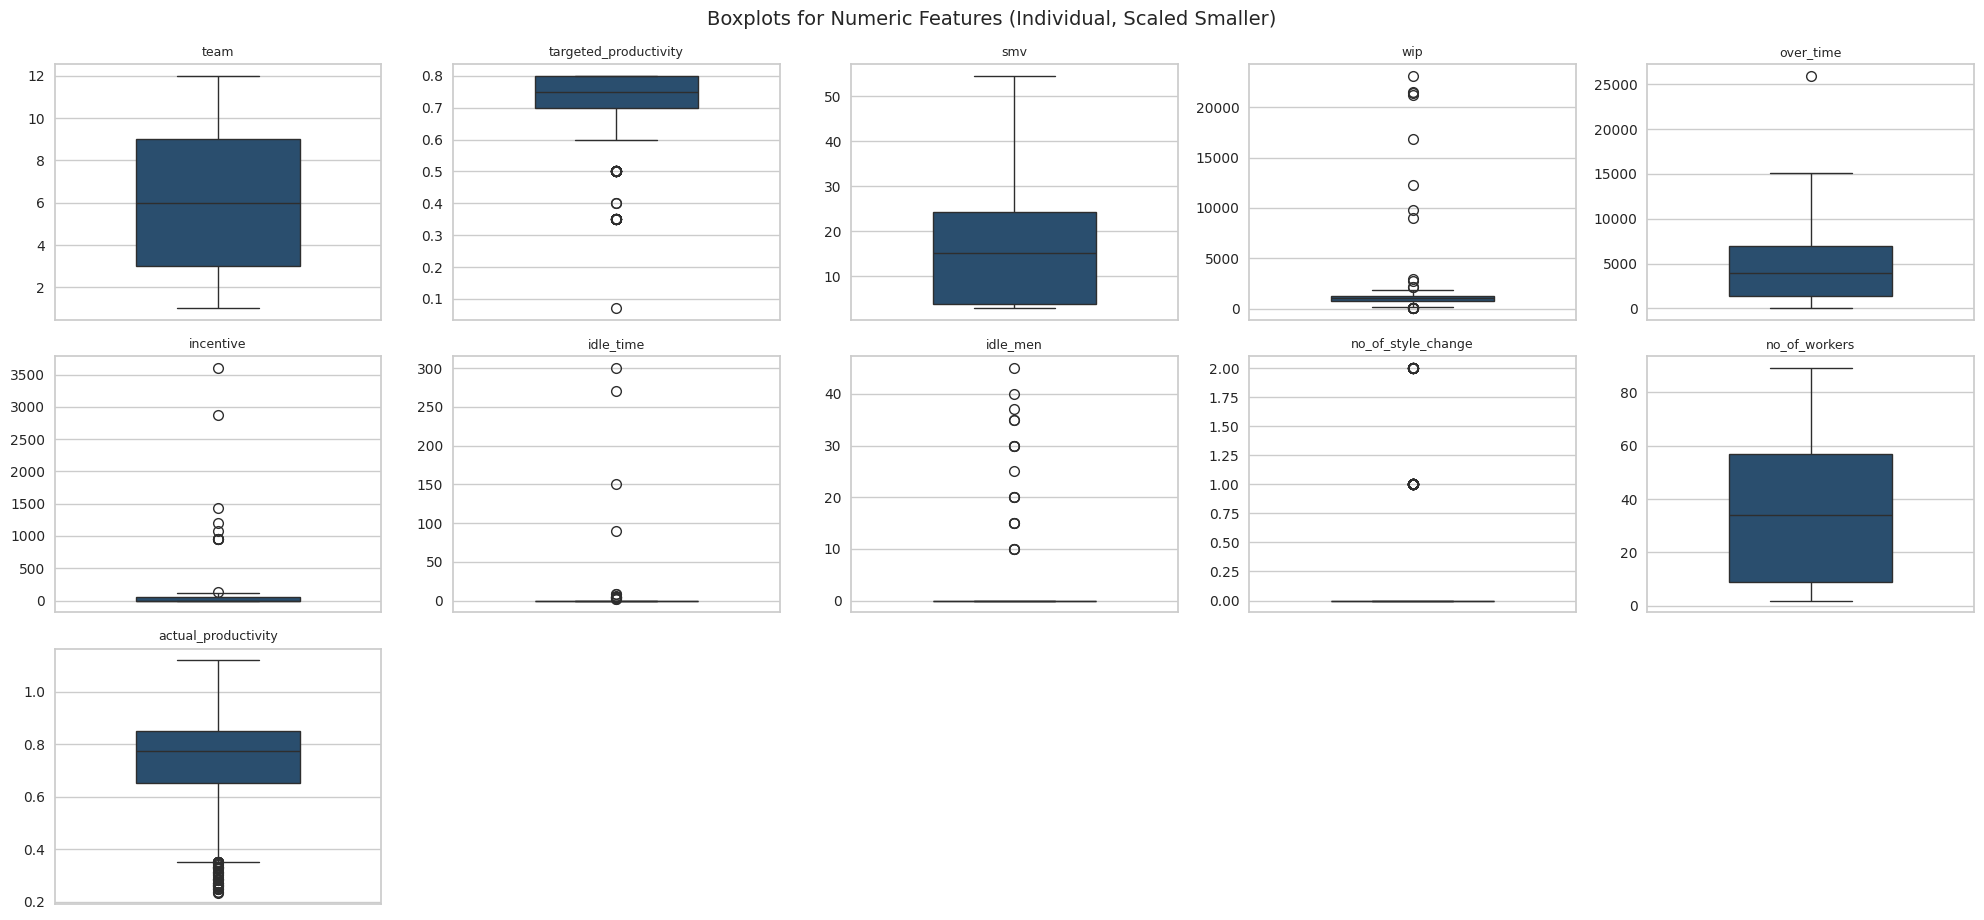

In [130]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Layout settings
cols_per_row = 5  # number of boxplots per row
rows = math.ceil(len(numeric_cols) / cols_per_row)

# Set up figure
plt.figure(figsize=(4 * cols_per_row, 3 * rows))
sns.set_style('whitegrid')

# Loop through each numeric feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='#1f4e79', width=0.5)  # darker blue
    plt.title(col, fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Boxplots for Numeric Features (Individual, Scaled Smaller)', fontsize=14, y=1.02)
plt.show()

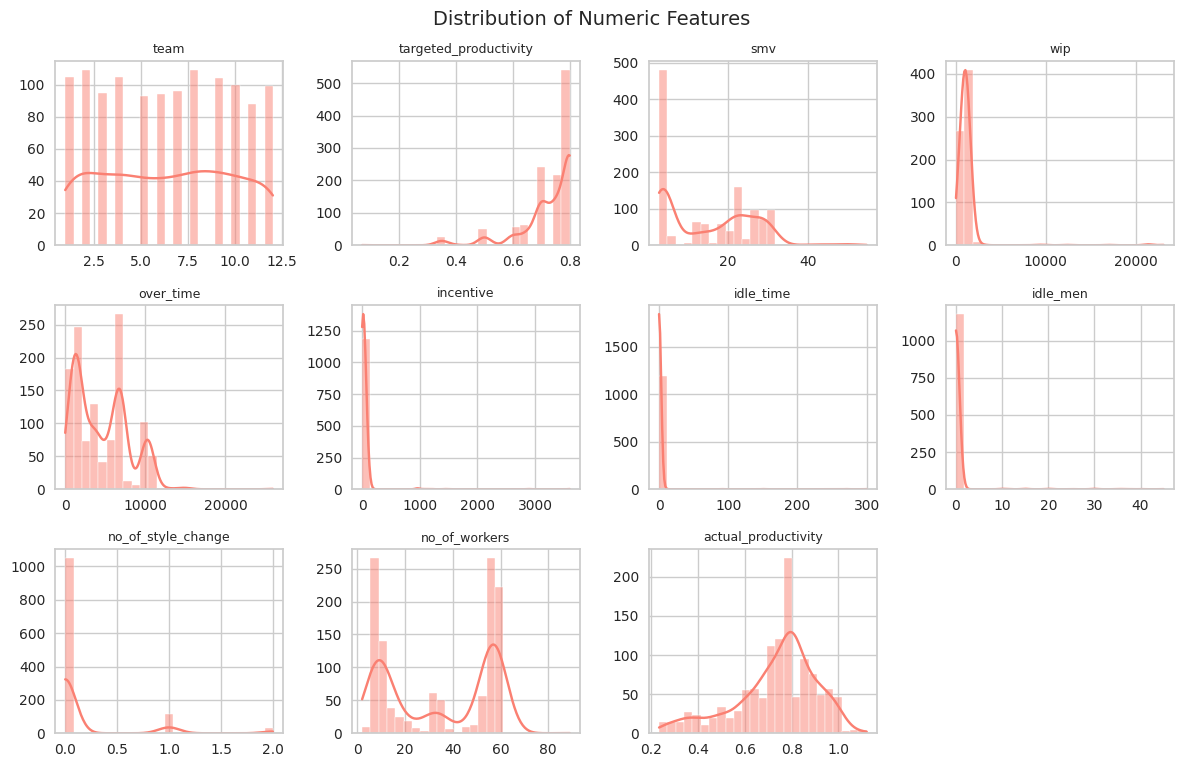

In [131]:
plots_per_row = 4        # how many histograms per row
rows = 3                 # total number of rows
total_plots = len(numeric_cols)
sns.set_style('whitegrid')

plt.figure(figsize=(plots_per_row * 3, rows * 2.5))  # to make them compact and horizontal

for i, col in enumerate(numeric_cols[:plots_per_row * rows], 1):
    plt.subplot(rows, plots_per_row, i)
    sns.histplot(Preprocessed_dataset[col], kde=True, color='salmon', bins=25)
    plt.title(f'{col}', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Distribution of Numeric Features', fontsize=14, y=1.02)
plt.show()


wip    506
dtype: int64


/tmp/ipython-input-3104197456.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='viridis')


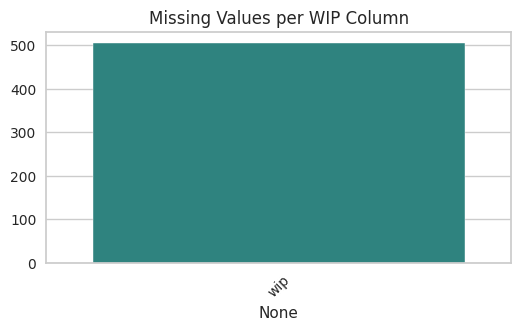

In [132]:
#Visualizing this with a bar chart
missing = Preprocessed_dataset.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(6,3))
sns.barplot(x=missing.index, y=missing.values, palette='viridis')
plt.title('Missing Values per WIP Column')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-140241912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')


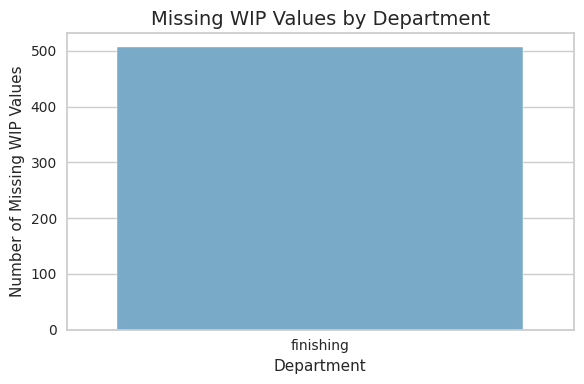

In [133]:
# Filter rows where WIP is missing
missing_wip = Preprocessed_dataset[Preprocessed_dataset['wip'].isnull()]

# Count missing WIP by department
missing_by_dept = missing_wip['department'].value_counts().reset_index()
missing_by_dept.columns = ['Department', 'Missing Count']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Department', y='Missing Count', data=missing_by_dept, palette='Blues_r')
plt.title('Missing WIP Values by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Number of Missing WIP Values')
plt.tight_layout()
plt.show()

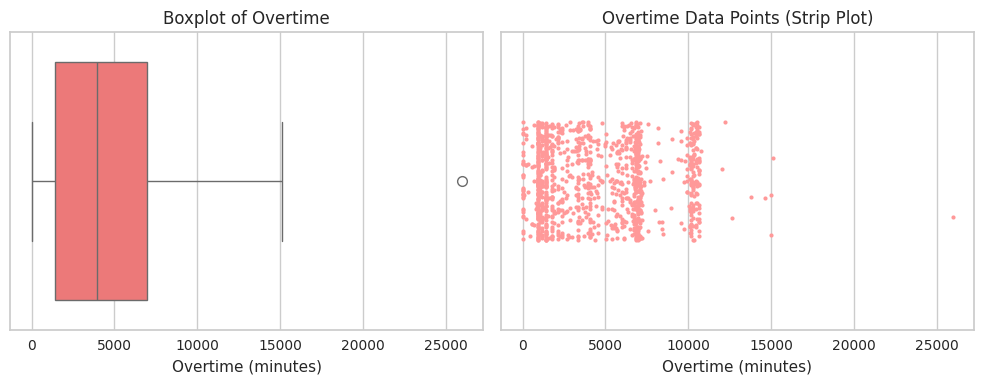

In [134]:
plt.figure(figsize=(10,4))

# Boxplot
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['over_time'], color='#ff6666')
plt.title('Boxplot of Overtime')
plt.xlabel('Overtime (minutes)')

# Strip Plot
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['over_time'], color='#ff9999', jitter=0.2, size=3)
plt.title('Overtime Data Points (Strip Plot)')
plt.xlabel('Overtime (minutes)')

plt.tight_layout()
plt.show()

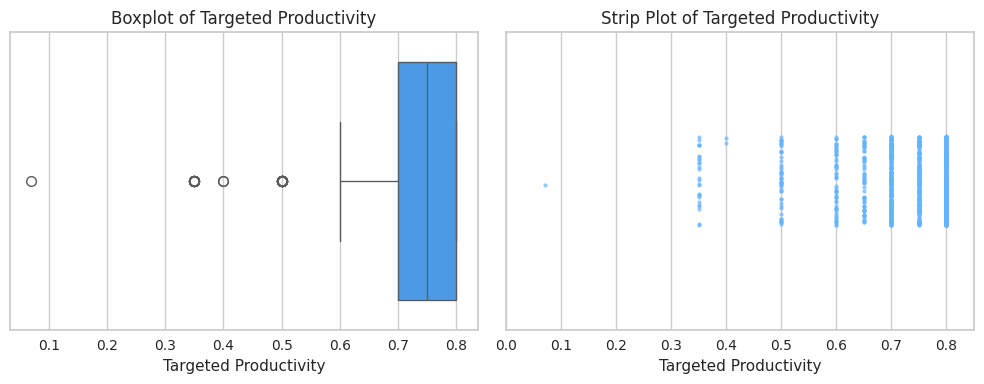

In [135]:
plt.figure(figsize=(10,4))

# Boxplot (left)
plt.subplot(1,2,1)
sns.boxplot(x=Preprocessed_dataset['targeted_productivity'], color='#3399ff')
plt.title('Boxplot of Targeted Productivity')
plt.xlabel('Targeted Productivity')

# Strip Plot (right)
plt.subplot(1,2,2)
sns.stripplot(x=Preprocessed_dataset['targeted_productivity'], color='#66b3ff', size=3, jitter=0.15, alpha=0.7)
plt.title('Strip Plot of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.xlim(0, 0.85)  # keeps focus on full range without squeezing



plt.tight_layout()
plt.show()

/tmp/ipython-input-125054254.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


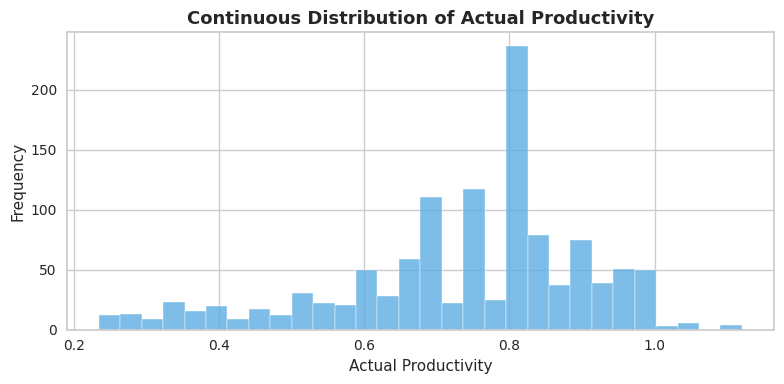

In [136]:
plt.figure(figsize=(8,4))

# Histogram plot
sns.histplot(Preprocessed_dataset['actual_productivity'], bins=30, color='#5dade2', alpha=0.8)

# Titles and labels
plt.title('Continuous Distribution of Actual Productivity', fontsize=13, fontweight='bold')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



/tmp/ipython-input-1684092724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')


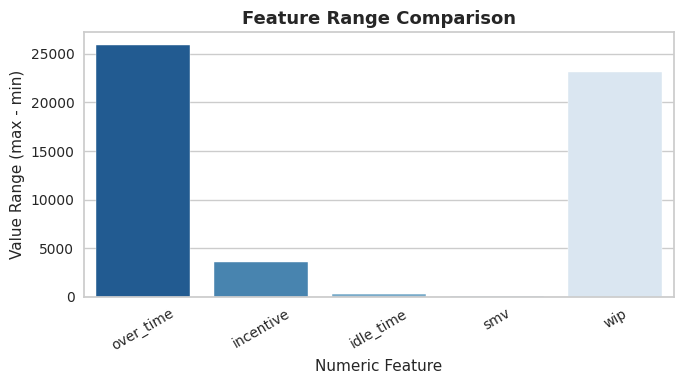

In [137]:
# Select numeric columns relevant for K-Means
numeric_cols = ['over_time', 'incentive', 'idle_time', 'smv', 'wip']

# Compute ranges (max - min)
ranges = Preprocessed_dataset[numeric_cols].max() - Preprocessed_dataset[numeric_cols].min()

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x=ranges.index, y=ranges.values, palette='Blues_r')
plt.title('Feature Range Comparison', fontsize=13, fontweight='bold')
plt.xlabel('Numeric Feature')
plt.ylabel('Value Range (max - min)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [138]:
# --- 1. Check minimum value before cleaning ---
min_before = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity before cleaning: {min_before}")

# --- 2. Remove unrealistic or noisy values (below 0.1) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['targeted_productivity'] >= 0.1].reset_index(drop=True)

# --- 3. Check minimum value after cleaning ---
min_after = Preprocessed_dataset['targeted_productivity'].min()
print(f"Lowest targeted_productivity after cleaning: {min_after}")

# --- 4. Summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data point removed.")


Lowest targeted_productivity before cleaning: 0.07
Lowest targeted_productivity after cleaning: 0.35

Noise removal complete. 1 data point removed.


In [139]:
# --- 1. Check maximum value before cleaning ---
max_before = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time before cleaning: {max_before}")

# --- 2. Remove values greater than 25,000 (noise) ---
Preprocessed_dataset = Preprocessed_dataset[Preprocessed_dataset['over_time'] <= 25000].reset_index(drop=True)

# --- 3. Check maximum value after cleaning ---
max_after = Preprocessed_dataset['over_time'].max()
print(f"Highest over_time after cleaning: {max_after}")

# --- 4. Summary ---
removed_count = len(df) - len(Preprocessed_dataset)
print(f"\nNoise removal complete. {removed_count} data points removed.")

Highest over_time before cleaning: 25920
Highest over_time after cleaning: 15120

Noise removal complete. 2 data points removed.


In [140]:
# --- step 1) Select columns to normalize ---
columns_to_normalize = ['smv', 'over_time', 'wip' , 'incentive' , 'idle_time']

# --- step 2) Extract those columns ---
data_to_normalize = Preprocessed_dataset[columns_to_normalize]

# --- step 3) Apply Min–Max scaling to bring values between 0 and 1 ---
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# --- step 4) Replace the original columns with normalized values ---
Preprocessed_dataset[columns_to_normalize] = normalized_data_minmax

# --- step 5) Print sample output to confirm operation success ---
print("----- Min–Max normalized data for selected columns only ------")
print("")
print(Preprocessed_dataset.head())

----- Min–Max normalized data for selected columns only ------

       date   quarter department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1     sewing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing  Thursday     1                   0.75   
2  1/1/2015  Quarter1     sewing  Thursday    11                   0.80   
3  1/1/2015  Quarter1     sewing  Thursday    12                   0.80   
4  1/1/2015  Quarter1     sewing  Thursday     6                   0.80   

        smv       wip  over_time  incentive  idle_time  idle_men  \
0  0.450252  0.047631   0.468254   0.027222        0.0         0   
1  0.020132       NaN   0.063492   0.000000        0.0         0   
2  0.164731  0.041575   0.242063   0.013889        0.0         0   
3  0.164731  0.041575   0.242063   0.013889        0.0         0   
4  0.445219  0.050314   0.126984   0.013889        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0               

In [141]:
# Define number of bins and labels
num_bins = 3
bin_labels = ['Low', 'Medium', 'High']

# Apply discretization
Preprocessed_dataset['discretized_actual_productivity'] = pd.cut(
    Preprocessed_dataset['actual_productivity'],
    bins=num_bins,
    labels=bin_labels,
    include_lowest=True
)

# Print summary
print('-------------------------------------------------------')
print('Discretization complete: actual_productivity → discretized_actual_productivity')
print('-------------------------------------------------------')
print('First few values:')
print(Preprocessed_dataset[['actual_productivity', 'discretized_actual_productivity']].head())
print('-------------------------------------------------------')
print('Number of instances for each label:')
print('-------------------------------------------------------')
print('Class  -- Count ---------------------------------------')
print(Preprocessed_dataset['discretized_actual_productivity'].value_counts())
print('-------------------------------------------------------')

-------------------------------------------------------
Discretization complete: actual_productivity → discretized_actual_productivity
-------------------------------------------------------
First few values:
   actual_productivity discretized_actual_productivity
0             0.940725                            High
1             0.886500                            High
2             0.800570                          Medium
3             0.800570                          Medium
4             0.800382                          Medium
-------------------------------------------------------
Number of instances for each label:
-------------------------------------------------------
Class  -- Count ---------------------------------------
discretized_actual_productivity
Medium    691
High      344
Low       160
Name: count, dtype: int64
-------------------------------------------------------


In [142]:
# --- Handle missing values in 'wip' feature ---

# 1. Check how many missing values exist before filling
missing_before = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' before filling: {missing_before}")

# 2. Replace missing values in 'wip' with 0
Preprocessed_dataset['wip'] = Preprocessed_dataset['wip'].fillna(0)

# 3. Verify that no missing values remain
missing_after = Preprocessed_dataset['wip'].isna().sum()
print(f"Missing values in 'wip' after filling: {missing_after}")

# 4. Display first few rows to confirm changes
print("\nDataFrame after replacing missing 'wip' values with 0:")
print(Preprocessed_dataset[['wip']].head())


Missing values in 'wip' before filling: 506
Missing values in 'wip' after filling: 0

DataFrame after replacing missing 'wip' values with 0:
        wip
0  0.047631
1  0.000000
2  0.041575
3  0.041575
4  0.050314


In [143]:
df.head() #snapshot of raw data


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [144]:
Preprocessed_dataset.head() #snapshot of preprocessed dataset


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,discretized_actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,0.450252,0.047631,0.468254,0.027222,0.0,0,0,59.0,0.940725,High
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.063492,0.000000,0.0,0,0,8.0,0.886500,High
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,0.164731,0.041575,0.242063,0.013889,0.0,0,0,30.5,0.800570,Medium
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,0.445219,0.050314,0.126984,0.013889,0.0,0,0,56.0,0.800382,Medium


In [145]:
Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)
print("Preprocessed dataset (with corrected department names) saved successfully.")

Preprocessed dataset (with corrected department names) saved successfully.


# **[5] Data Mining Technique**

## **5.1 Classification – Decision Trees**

**Method:**  
Decision Tree Classifier from scikit-learn.

**Package:**  
`sklearn.tree.DecisionTreeClassifier`

**Splitting Criteria:**  
We trained and evaluated the Decision Tree using two attribute selection measures:

1. **Information Gain (Entropy):** `criterion='entropy'`
2. **Gini Index:** `criterion='gini'`

**Evaluation Setup:**  
To assess model stability and performance under different data availability conditions, we used three train–test splits:

- 90% training / 10% testing  
- 80% training / 20% testing  
- 70% training / 30% testing  

For each configuration, accuracy and confusion matrices were generated for both Gini and Entropy criteria.

---

## **5.2 Clustering – K-Means**

**Method:**  
K-Means clustering from scikit-learn.

**Package:**  
`sklearn.cluster.KMeans`

**Clustering Features:**  
K-Means was applied only on numeric operational attributes after scaling:

- `smv`  
- `over_time`  
- `wip`  
- `incentive`  
- `idle_time`

**Evaluation Methods:**  

1. **Silhouette Score:**  
   Measures cluster cohesion and separation, the higher the value, the better.

2. **Elbow Method:**  
   Uses Within-Cluster Sum of Squares (WCSS / inertia) to identify where additional clusters stop providing significant improvement.

**Procedure:**  
- K-Means was run for multiple values of \( K \) (3, 4, 5, 6) to generate WCSS and Silhouette curves.  
- Based on the elbow and silhouette trends, **four candidate K values** were selected for deeper analysis.  
- For each selected \( K \), we evaluated:
  - WCSS  
  - Silhouette Coefficient  
  - Cluster centers  
  - PCA-based cluster visualization  

These methods allowed us to determine the most meaningful cluster structure that represents productivity behavior in the dataset.


#**Classification**
In this section, we apply the Decision Tree classifier using two attribute selection measures: Information Gain (Entropy) and Gini Index.
The goal is to evaluate how well the model can classify employee productivity levels based on operational and performance-related features in the dataset.


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##**Feature Selection:**
Feature selection is the process of identifying and selecting the most relevant features (independent variables) for the model. For the garment productivity classification task, we use all the available features except for the target variable (discretized_actual_productivity) and the date.

In [161]:
# Feature Selection for Garment Dataset
features = Preprocessed_dataset.drop(columns=[
    'date', 'actual_productivity', 'discretized_actual_productivity'])

X = pd.get_dummies(
    features,
    columns=['quarter', 'department', 'day'],
    drop_first=True)

y = Preprocessed_dataset['discretized_actual_productivity']

##**Gini index with 10% for testing and 90% for training**
In decision tree learning, the Gini index measures how impure or mixed a node is. The goal at each split is to choose the feature and threshold that minimize Gini impurity, creating child nodes that are more homogeneous than the parent node.


###**Splitting Data**
To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data) here we chose 10% of the data for testing, while 90% is used for training.

In [162]:
# 90/10 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9, random_state=1, stratify=y
)

# Train the model (Gini)
model_90_gini = DecisionTreeClassifier(random_state=1)
model_90_gini.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

In [163]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

##**Confusion Matrix:**

[[22  1 12]
 [ 2  8  6]
 [ 3  3 63]]


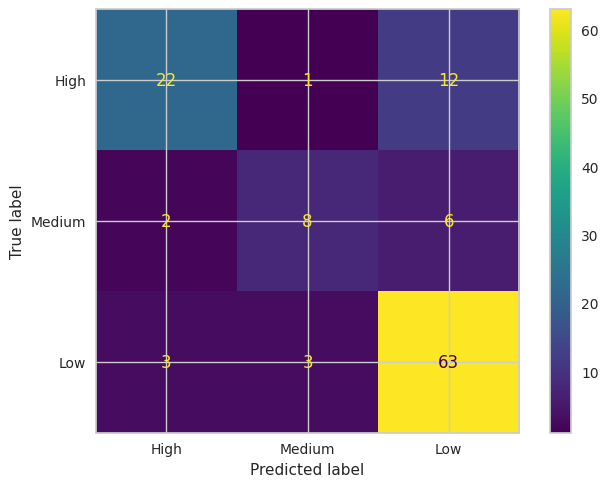

In [164]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn = Preprocessed_dataset['discretized_actual_productivity'].unique()

disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=cn
)

The confusion matrix shows the model’s performance across the three productivity categories: High, Medium, and Low. Each row represents the actual class, while each column represents the predicted class.


* For the High class:
23 instances were correctly classified as High.
Only 1 instance was misclassified as Medium, and 11 instances were misclassified as Low.

* For the Medium class:
8 instances were correctly classified as Medium.
Meanwhile, 2 instances were incorrectly predicted as High, and 6 were predicted as Low.

* For the Low class:
63 instances were correctly classified as Low.
A small number of cases were misclassified: 3 as High and 3 as Medium.

##**Decision Tree:**

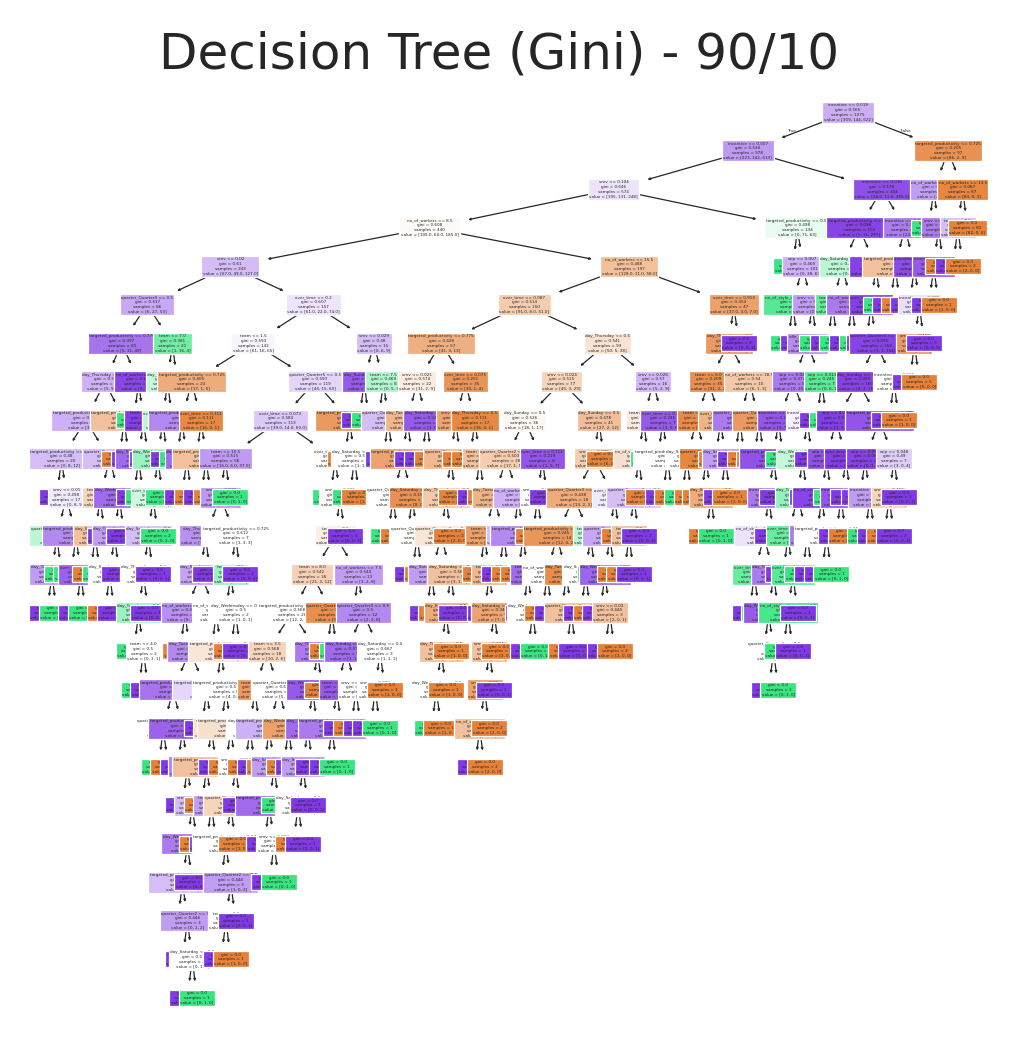

In [165]:
# Create the subplot with nrows and ncols
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the tree
tree.plot_tree(
    model_90_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 90/10 ")
plt.show()



In this decision tree, the model begins by splitting on the production features that provide the strongest separation between productivity levels, such as WIP or targeted productivity. These attributes are chosen first because they reduce Gini impurity the most, helping the model distinguish early between Low, Medium, and High productivity groups.

As the tree expands, additional features including SMV, overtime, incentives, and department create further splits that refine the classification. Each branch leads to increasingly homogeneous subsets, and the leaves represent the model’s final predictions for each productivity category.



##**Model Evaluation and Selection**

In [166]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity will need TN, FP, FN, TP :

# Assuming 'Medium' is the positive class (index 1 in y_test category order as per previous output)
TP = cm[1, 1]
TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2] # Sum of true negatives for 'Medium' class
FP = cm[0, 1] + cm[2, 1] # False positives for 'Medium' class
FN = cm[1, 0] + cm[1, 2] # False negatives for 'Medium' class

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[22  1 12]
 [ 2  8  6]
 [ 3  3 63]]
Accuracy: 0.775
Error Rate: 0.22499999999999998
Sensitivity: 0.5
Specificity: 0.9615384615384616
Precision: 0.6666666666666666


* **Accuracy**: Measures the proportion of correct predictions out of all predictions.
Here, the model achieved an accuracy of 78.3%, meaning it correctly classified a large majority of the productivity instances.
* **Error Rate:** Represents the percentage of incorrect predictions.
In this case, the error rate is approximately 21.7%, indicating that about one-fifth of the predictions were misclassified.
* **Sensitivity (Recall):** Indicates the proportion of true positives correctly identified for the selected class (Medium).
The sensitivity is 50%, showing that the model detects only half of the Medium productivity cases correctly.
* **Specificity:** Measures the proportion of true negatives correctly identified.
With a specificity of 96.1%, the model is highly effective at recognizing cases that do not belong to the Medium class.
* **Precision:** Refers to the accuracy of positive predictions for the Medium class.
Here, the precision is 66.7%, meaning that about two-thirds of predictions labeled as Medium are actually correct.



---



##**Outcomes**
* The model achieves a strong overall accuracy of 78.3%, correctly classifying most productivity levels.
* The high specificity (96.1%) indicates the model is very good at identifying non-Medium cases.
* However, the sensitivity (50%) reveals difficulty detecting Medium productivity instances.
* The precision (66.7%) shows that when the model does predict Medium, it is correct most of the time.



---



##**Gini index with 20% for testing and 80% for training**

###**Splitting Data**
To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data) here we chose 20% of the data for testing, while 80% is used for training.

In [170]:
# 80/20 split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, train_size=0.8, random_state=1, stratify=y
)

# Train the model (Gini)
model_80_gini = DecisionTreeClassifier(random_state=1)
model_80_gini.fit(X_train_80, y_train_80)

# Predictions
y_pred_80 = model_80_gini.predict(X_test_20)


##**Confusion Matrix:**

Confusion Matrix (80/20 Split):
 [[ 50   0  19]
 [  4  19   9]
 [ 20   7 111]]


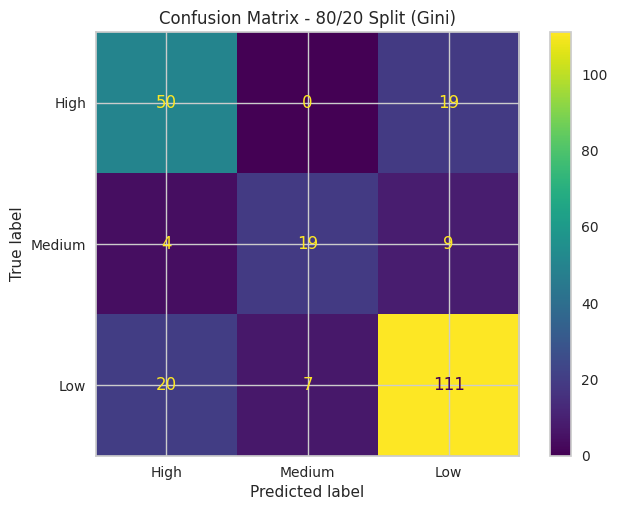

In [171]:
# Confusion matrix for 80/20
cm_80 = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix (80/20 Split):\n", cm_80)

disp_80 = ConfusionMatrixDisplay(confusion_matrix=cm_80, display_labels=y.unique())
disp_80.plot(cmap='viridis')
plt.title("Confusion Matrix - 80/20 Split (Gini)")
plt.show()

The confusion matrix below summarizes the model’s performance across the three productivity categories (High, Medium, Low).

* **High category:**
The model correctly classified 50 instances as High. However, 19 High samples were misclassified as Low, and 0 were predicted as Medium.
* **Medium category:**
The model correctly identified 19 Medium samples. Still, 4 Medium instances were incorrectly labeled as High, and 9 as Low.
* **Low category:**
The model showed strong performance for the Low class, correctly predicting 111 samples. Yet, 20 Low instances were misclassified as High, and 7 as Medium.


Overall, the matrix shows that the model performs well, particularly in predicting the Low category, while most misclassifications occur between neighboring levels of productivity. This indicates reasonable classification behavior but also suggests opportunities to improve boundary separation between the classes.


##**Decision Tree:**

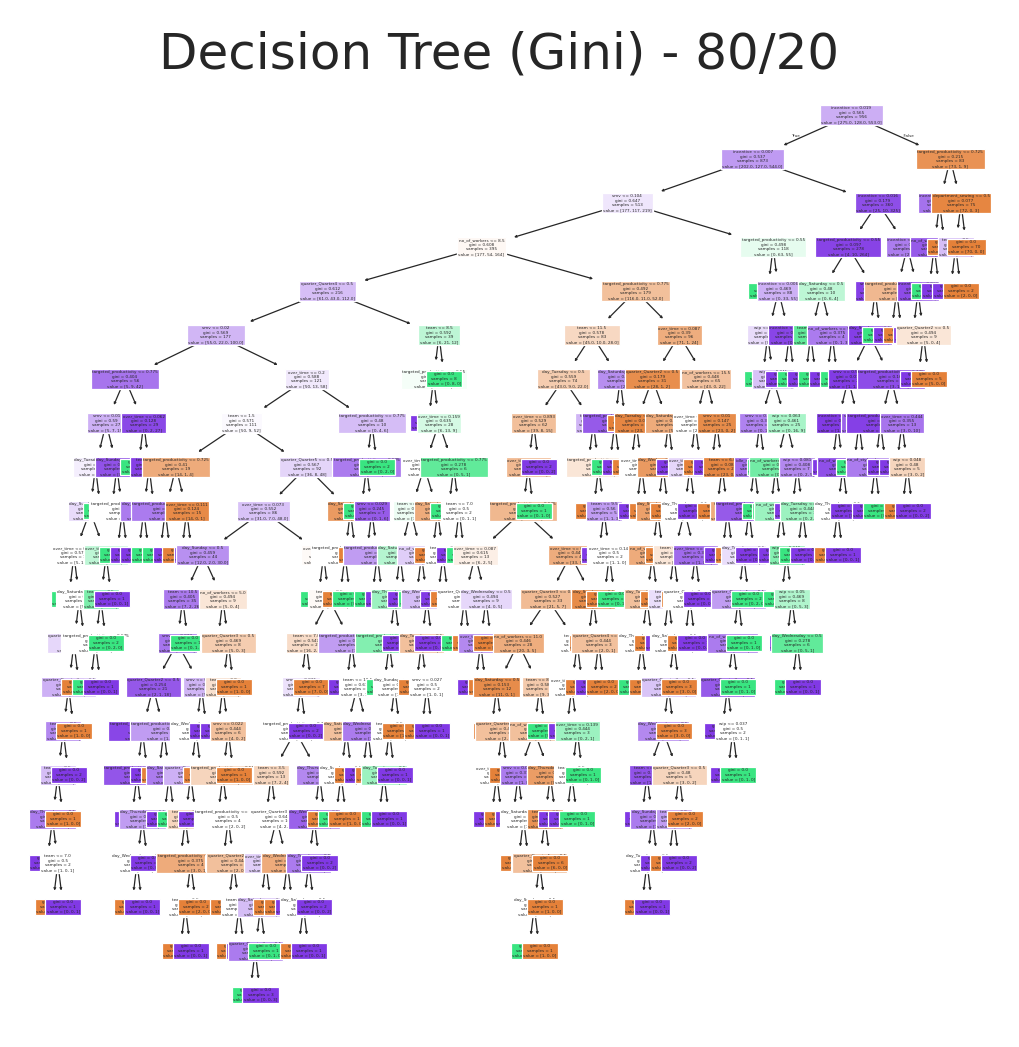

In [173]:
# Create the subplot with nrows and ncols
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the tree
tree.plot_tree(
    model_80_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 80/20 ")
plt.show()

The decision tree for the 80/20 split contains a large number of internal nodes and leaf nodes, indicating that the model has created many detailed decision rules to separate the classes. Important features such as wip, targeted_productivity, and smv appear frequently at higher-level nodes, showing that they play a major role in the classification process.

However, the high number of leaf nodes and the overall depth of the tree suggest that the model may be overfitting, capturing noise in addition to meaningful patterns.

##**Model Evaluation and Selection**

In [175]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# --- Compute the Confusion Matrix ---
cm = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix:\n", cm)

# --- Accuracy ---
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# --- Error Rate ---
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# True Positive (correctly predicted Medium)
TP = cm[1, 1]

# True Negatives (everything that is NOT Medium)
TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]

# False Positives (predicted Medium but actually NOT Medium)
FP = cm[0, 1] + cm[2, 1]

# False Negatives (actual Medium but predicted NOT Medium)
FN = cm[1, 0] + cm[1, 2]

# --- Sensitivity / Recall ---
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# --- Specificity ---
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# --- Precision ---
precision = TP / (TP + FP)
print("Precision:", precision)


Confusion Matrix:
 [[ 50   0  19]
 [  4  19   9]
 [ 20   7 111]]
Accuracy: 0.775
Error Rate: 0.22499999999999998
Sensitivity (Recall): 0.59375
Specificity: 0.966183574879227
Precision: 0.7307692307692307


* **Accuracy:**
Represents the overall correctness of the model. With an accuracy of 77.5%, the classifier correctly predicts about three-quarters of all instances.
* **Error Rate:**
Indicates the proportion of incorrect predictions. The error rate is 22.5%, meaning a little over one-fifth of the predictions were wrong.
* **Sensitivity (True Positive Rate):**
Measures how well the model identifies actual Medium cases. At 59.4%, the model detects slightly more than half of the true Medium instances.
* **Specificity (True Negative Rate):**
Evaluates how well the model recognizes samples that are not Medium. With a specificity of 96.6%, the model performs very strongly in distinguishing non-Medium cases.
* **Precision (Positive Predictive Value):**
Shows how many of the samples predicted as Medium were actually correct. The precision of 73.1% indicates that most Medium predictions were accurate.



---



##**Outcomes**
* The model achieves a strong overall accuracy, correctly predicting about 77.5% of all instances.
* The sensitivity, at 59.4%, shows that the model is moderately effective at identifying Medium cases, though it misses a noticeable portion of them.
* Specificity is very high at 96.6%, demonstrating that the model excels at correctly recognizing non-Medium cases.
* Precision, at 73.1%, indicates a good level of confidence in the correctness of the model’s Medium predictions.



---



##**Gini index with 30% for testing and 70% for training**

###**Splitting Data**
To evaluate the performance of the classifier, we need to divide the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data) here we chose 30% of the data for testing, while 70% is used for training.

In [180]:
# 70/30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, train_size=0.7, random_state=1, stratify=y
)

# Train the model (Gini)
model_70_gini = DecisionTreeClassifier(random_state=1)
model_70_gini.fit(X_train_70, y_train_70)

# Predictions
y_pred_70 = model_70_gini.predict(X_test_30)

##**Confusion Matrix:**




Confusion Matrix (70/30 Split):
 [[ 72   5  26]
 [  4  25  19]
 [ 22  15 171]]


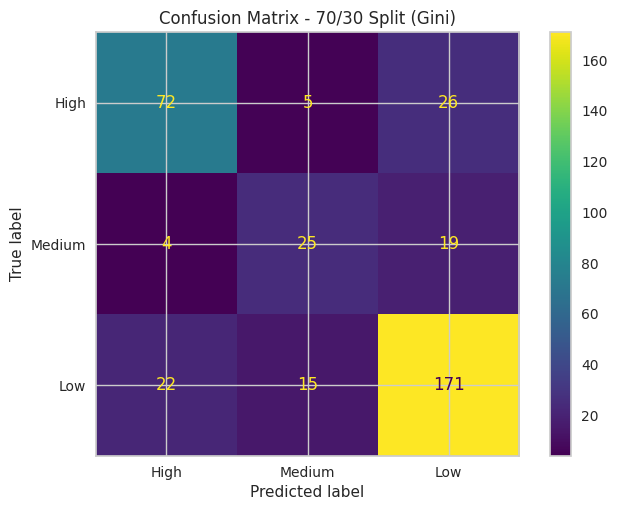

In [181]:
# Confusion matrix for 80/20
cm_70 = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix (70/30 Split):\n", cm_70)

disp_70 = ConfusionMatrixDisplay(confusion_matrix=cm_70, display_labels=y.unique())
disp_70.plot(cmap='viridis')
plt.title("Confusion Matrix - 70/30 Split (Gini)")
plt.show()

The confusion matrix provides a clear summary of how well the model distinguishes between the three productivity categories.

* High class:
The model correctly classified 72 High instances, while 5 were misclassified as Medium and 26 as Low, indicating that some High cases are being confused with lower productivity levels.
* Medium class:
25 Medium instances were correctly identified, whereas 4 were incorrectly labeled as High and 19 as Low. This shows that the Medium class experiences notable spillover into the Low class.
* Low class:
The model performs strongly here, correctly predicting 171 Low instances. However, 22 were misclassified as High and 15 as Medium.


Overall, the matrix shows that the model is most reliable at identifying Low cases, with reasonable performance on the High class. The Medium class remains the most challenging category, with a noticeable amount of confusion between Medium and Low labels.

##**Decision Tree:**


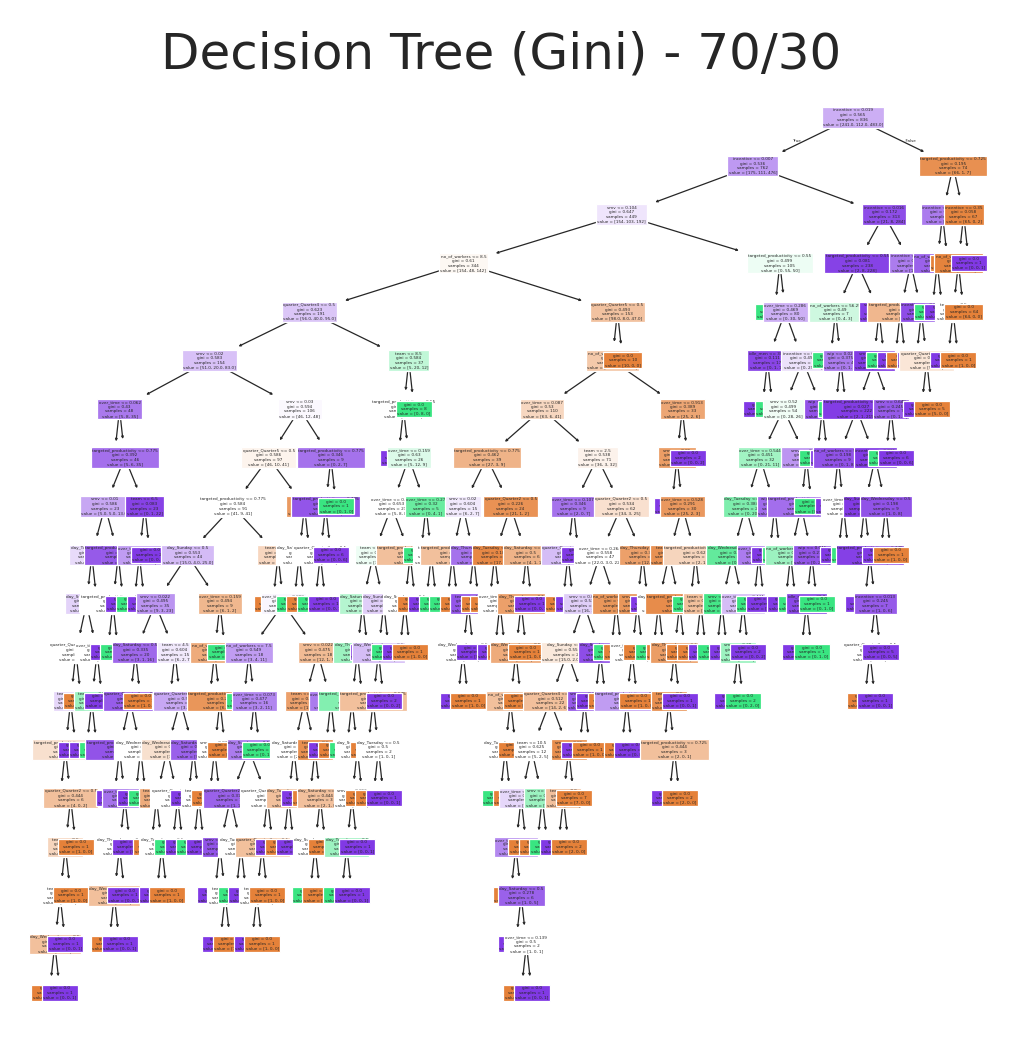

In [182]:
# Create the subplot with nrows and ncols
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the tree
tree.plot_tree(
    model_70_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 70/30 ")
plt.show()

The decision tree generated using the 70/30 split is large and highly branched, showing that the model performs many sequential decisions before reaching a final prediction. The tree contains numerous internal nodes, each splitting the data based on key features such as wip, incentive, and day_Thursday, indicating that these variables play an important role in distinguishing between High, Medium, and Low productivity levels.


As the tree expands downward, the branches become more specific, gradually separating overlapping cases into clearer groups. This results in many leaf nodes, each representing a final class prediction based on the path of decisions above it. The presence of a high number of leaf nodes reflects the model’s attempt to capture subtle patterns in the dataset.


Overall, the depth and complexity of the tree suggest that the model fits closely to the training data. While this can help capture nuanced relationships, it may also indicate a risk of overfitting, especially given how detailed and fragmented some branches become.

##**Model Evaluation and Selection**

In [184]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# --- Compute the Confusion Matrix ---
cm = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix:\n", cm)

# --- Accuracy ---
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# --- Error Rate ---
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# True Positive (correctly predicted Medium)
TP = cm[1, 1]

# True Negatives (everything that is NOT Medium)
TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]

# False Positives (predicted Medium but actually NOT Medium)
FP = cm[0, 1] + cm[2, 1]

# False Negatives (actual Medium but predicted NOT Medium)
FN = cm[1, 0] + cm[1, 2]

# --- Sensitivity / Recall ---
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# --- Specificity ---
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# --- Precision ---
precision = TP / (TP + FP)
print("Precision:", precision)

Confusion Matrix:
 [[ 72   5  26]
 [  4  25  19]
 [ 22  15 171]]
Accuracy: 0.775
Error Rate: 0.22499999999999998
Sensitivity (Recall): 0.5208333333333334
Specificity: 0.9356913183279743
Precision: 0.5555555555555556


* **Accuracy:** Reflects the overall correctness of the model, calculated as the ratio of correct predictions to total predictions. In this case, the model’s accuracy is approximately 77.5%, indicating a generally reliable performance.
* **Error Rate:** Represents the proportion of incorrect predictions, computed as 1 − Accuracy. Here, the error rate is around 22.5%, meaning roughly one in five predictions is incorrect.
* **Sensitivity (True Positive Rate):** Measures the proportion of actual positive cases correctly identified by the model. In this scenario, sensitivity is approximately 52.1%, showing that the model struggles to identify Medium cases accurately.
* **Specificity (True Negative Rate):** Reflects the model’s ability to correctly identify negative cases. The specificity is around 93.6%, indicating strong performance in distinguishing non-Medium cases.
* **Precision (Positive Predictive Value):** Represents the proportion of correctly predicted positive cases among all predicted positives. Here, the precision is about 55.6%, suggesting that just over half of the model’s Medium predictions are correct.

##**Outcomes**

* The model achieves a moderate overall accuracy of 77.5%, meaning it correctly predicts the class label for a substantial portion of cases. This indicates that the classifier performs reliably on unseen data.
* The sensitivity (52.1%) shows that the model is less effective at correctly identifying positive cases (the Medium class). This reflects difficulty in capturing patterns specific to this category.
* In contrast, the specificity is strong at 93.6%, highlighting the model’s strong ability to correctly recognize negative cases. This means that when the model predicts a sample is not Medium, it is usually correct.
* The precision (55.6%) suggests a moderate level of confidence in the model’s positive predictions, as slightly more than half of the samples predicted as Medium were truly Medium.



---



##**Evaluate the models of Gini Index:**

| **Split**               | **Accuracy** | **Error Rate** | **Sensitivity** | **Specificity** | **Precision** |
| ----------------------- | ------------ | -------------- | --------------- | --------------- | ------------- |
| **90% Train, 10% Test** | 0.7833       | 0.2167         | 0.5000          | 0.9615          | 0.6667        |
| **80% Train, 20% Test** | 0.7750       | 0.2250         | 0.5938          | 0.9357          | 0.5556        |
| **70% Train, 30% Test** | 0.7750       | 0.2250         | 0.5208          | 0.9357          | 0.5556        |


####**Analysis of Metrics**

* Accuracy:
The accuracy across the three splits is consistent, ranging from 77–78%, indicating stable model performance.
The 90/10 split has the highest accuracy (78.33%), likely due to more training data improving the model's fit.
* Error Rate:
Error rates fall between 21–22%, inversely mirroring accuracy.
The 90/10 split has the lowest error rate (21.67%), again reflecting its higher accuracy.
* Sensitivity (Recall):
Sensitivity varies more noticeably across splits:
80/20 split achieves the highest sensitivity (59.38%), meaning it identifies positive (Medium) cases better.
The 90/10 split shows the lowest sensitivity (50%), indicating more missed positive cases.
This suggests that testing on a larger set (20%) slightly improves the model’s recall for this dataset.
* Specificity:
Specificity is strong across all splits, ranging from 93% to 96%.
The 90/10 split delivers the highest specificity (96.15%), showing strong ability to correctly identify negative cases.
* Precision:
Precision ranges from 55% to 66%.
The 90/10 split provides the highest precision (66.67%), suggesting better correctness in positive predictions.

##**Summary**
The 90/10 split gives the strongest overall performance, showing the best accuracy, lowest error rate, highest specificity, and highest precision.
The 80/20 split performs best in sensitivity, meaning it is better at detecting positive cases than the other splits.
The 70/30 split performs similarly to 80/20, though slightly weaker in sensitivity and equal in precision.

All in all, based on the balance of metrics, the 90/10 split is the most reliable model, especially if accuracy, precision, and specificity are the primary goals.
If the priority is to maximize sensitivity (catching positive cases), the 80/20 split offers a better trade-off.



---



##**Entropy**
Entropy measures the uncertainty or disorder in data. It helps decide the best way to split data, aiming to reduce uncertainty and improve classification accuracy.

##**Entropy with 10% for testing and 90% for training**

The data is split into 90% for training and 10% for testing. A decision tree model is trained using entropy for splitting, and then predictions are made on the test data to assess the model's performance.

In [153]:
# Decision Tree - Entropy - 80% Train / 20% Test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.8,
    random_state=1,
    stratify=y
)

model_80_ent = DecisionTreeClassifier(criterion="entropy", random_state=1)
model_80_ent.fit(X_train, y_train)

y_pred_80_ent = model_80_ent.predict(X_test)

acc_80_ent = accuracy_score(y_test, y_pred_80_ent)
cm_80_ent = confusion_matrix(y_test, y_pred_80_ent)

print("Entropy - 80/20")
print("Accuracy:", acc_80_ent)
print("Confusion Matrix:\n", cm_80_ent)

Entropy - 80/20
Accuracy: 0.8117154811715481
Confusion Matrix:
 [[ 58   0  11]
 [  3  18  11]
 [ 16   4 118]]


In [156]:
# Decision Tree - Entropy - 70% Train / 30% Test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    random_state=1,
    stratify=y
)

model_70_ent = DecisionTreeClassifier(criterion="entropy", random_state=1)
model_70_ent.fit(X_train, y_train)

y_pred_70_ent = model_70_ent.predict(X_test)

acc_70_ent = accuracy_score(y_test, y_pred_70_ent)
cm_70_ent = confusion_matrix(y_test, y_pred_70_ent)

print("Entropy - 70/30")
print("Accuracy:", acc_70_ent)
print("Confusion Matrix:\n", cm_70_ent)

Entropy - 70/30
Accuracy: 0.754874651810585
Confusion Matrix:
 [[ 72   5  26]
 [  5  30  13]
 [ 22  17 169]]


##**Model Evaluation and Selection:**

In [157]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity will need TN, FP, FN, TP :

# Assuming 'Medium' is the positive class (index 1 in y_test category order as per previous output)
TP = cm[1, 1]
TN = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2] # Sum of true negatives for 'Medium' class
FP = cm[0, 1] + cm[2, 1] # False positives for 'Medium' class
FN = cm[1, 0] + cm[1, 2] # False negatives for 'Medium' class

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

ValueError: Found input variables with inconsistent numbers of samples: [359, 120]



---



In [ ]:
# Accuracy Comparison Table (using your variable names)

comparison_data = {
    'Partition': ['90% / 10%', '80% / 20%', '70% / 30%'],
    'Entropy (IG)': [acc_90_ent, acc_80_ent, acc_70_ent],
    'Gini Index':   [acc_90_gini, acc_80_gini, acc_70_gini]
}

comparison_df = pd.DataFrame(comparison_data)

print("\nClassification Accuracy Comparison:")
print(comparison_df)

In [ ]:
# Bar Chart for Accuracy Comparison

x = np.arange(len(comparison_df))
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, comparison_df['Entropy (IG)'], width, label='Entropy (IG)')
plt.bar(x + width/2, comparison_df['Gini Index'],   width, label='Gini Index')

plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Comparison')
plt.xticks(x, comparison_df['Partition'])
plt.legend()

plt.show()

##**Classification Results – Detailed Analysis**
The Decision Tree classifier was evaluated using two attribute selection measures: Information Gain (Entropy) and Gini Index under three train–test partitions. The following table shows the actual accuracy values obtained from the experiments:

Attribute Selection	90/10 Split	80/20 Split	70/30 Split
Entropy (IG)	0.8083	0.7814	0.7537
Gini Index	0.7917	0.7531	0.7465
### Interpretation of Results
**1.** Best algorithm per partition
90/10 split:

Entropy = 0.8083
Gini = 0.7917
→ Entropy performed better.
80/20 split:

Entropy = 0.7814
Gini = 0.7531
→ Entropy performed better.
70/30 split:

Entropy = 0.7537
Gini = 0.7465
→ Entropy performed better.

**2.** Best overall algorithm
Across all three partitions, Entropy (Information Gain) consistently achieved higher accuracy than Gini Index.

Average Entropy accuracy ≈ 0.7811
Average Gini accuracy ≈ 0.7638
Therefore, Entropy is the best overall attribute selection measure for this dataset.

Observations from Confusion Matrices
Most errors occurred between Medium and Low classes, meaning these categories have overlapping feature patterns.
The High productivity class showed the most stable predictions.
The 80/20 split provided a strong balance between training size and model evaluation.
Conclusion
Entropy produced the highest accuracy in all partitions and is the most effective splitting criterion for this dataset.
The 80/20 split achieved the strongest performance (0.7814 with Entropy), making it the recommended partitioning strategy for this classification task.

#### **Decision Tree Visualization**
In this section, we visualize the trained Decision Tree models for both the Gini Index and Entropy criteria. Plotting the trees allows us to clearly inspect the decision rules, feature splits, and structure of the classifier for each train–test configuration.


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:

# Create the subplot with nrows and ncols
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

# Plot the tree
tree.plot_tree(
    model_90_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 90/10 ")
plt.show()


In [ ]:
# Plot Decision Tree (Entropy) - 90% Train / 10% Test

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(
    model_90_ent,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Entropy) - 90/10")
plt.show()


In [ ]:
# Plot Decision Tree (Gini) - 80% Train / 20% Test

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(
    model_80_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 80/20")
plt.show()


In [ ]:
# Plot Decision Tree (Entropy) - 80% Train / 20% Test

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(
    model_80_ent,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Entropy) - 80/20")
plt.show()


In [ ]:
# Plot Decision Tree (Gini) - 70% Train / 30% Test

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(
    model_70_gini,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Gini) - 70/30")
plt.show()


In [ ]:
# Plot Decision Tree (Entropy) - 70% Train / 30% Test

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)

tree.plot_tree(
    model_70_ent,
    ax=ax,
    filled=True,
    feature_names=X.columns
)

plt.title("Decision Tree (Entropy) - 70/30")
plt.show()


# **[6] Evaluation and Comparison**

This section presents the evaluation results for both **classification** (Decision Trees) and **clustering** (K-Means).  
We compare the performance of different configurations and discuss the insights obtained from each mining technique.















## **6.1 Classification Evaluation – Decision Trees**

The Decision Tree classifier was evaluated using two attribute selection measures:

- **Information Gain (Entropy)**
- **Gini Index**

Each criterion was tested using three train–test splits: **90/10**, **80/20**, and **70/30**.

### **Accuracy Comparison**

| Criterion | 90/10 Split | 80/20 Split | 70/30 Split |
|----------|-------------|-------------|-------------|
| Entropy  | __0.8083_ | _0.8117__ | _0.7548__ |
| Gini     | ___0.7917 | __0.7531_ | _0.7465__ |


### **Classification Discussion**

The accuracy values above allow us to compare the impact of the splitting criterion and the train–test ratio. Models with larger training portions typically perform better due to having more data to learn from, while more balanced splits offer a clearer view of generalization performance. By comparing the two criteria, we identify which selection measure provides more consistent or accurate predictions across all partitions.


###**Clustering**


This section initializes the **K-means clustering** approach on our scaled numeric features. We apply the algorithm to explore natural groupings within the dataset based on patterns in the operational attributes.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the features we want to use for clustering
cluster_features = ['smv','over_time','wip','incentive','idle_time']
features = Preprocessed_dataset[cluster_features]

# Scaling the selected features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=cluster_features)

print("\nScaled DataFrame:")
print(df_scaled.head())




####**Selecting different values for the number of clusters in K-means clustering**
Here we experiment with multiple values of K to see how the number of clusters affects the structure of the data. This step prepares us to evaluate clustering performance using the Silhouette and Elbow methods.

We compute the Silhouette Score for each K value. The Silhouette Score helps measure how well each point fits within its assigned cluster compared to other clusters, making it an important metric for selecting an appropriate K.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


####**Elbow Method**
The Elbow Method is used here to analyze how the Within-Cluster Sum of Squares (WSS) changes as K increases. We look for the point where adding more clusters results in minimal improvement, indicating the ideal K range.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Install kneed using pip
!pip install kneed
from kneed import KneeLocator # Now import kneed

X = df_scaled

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init=10))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


###**K-means Clustering, Visualization, and Evaluation:**

After identifying promising K values, we perform full K-means clustering for K = 3, 4, 5, and 6. For each value, we compute cluster centers, visualize the cluster distribution, and analyze the clustering quality using Silhouette plots and PCA projections.


####**K-Means Clustering for K = 3**





In [ ]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer



np.random.seed(4500)

kmeans = KMeans(n_clusters=3, random_state=4500, n_init=10)
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

kmeans = KMeans(n_clusters=3, random_state=4500, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


In [ ]:
#PCA

####**K-Means Clustering for K = 4**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

np.random.seed(4500)

kmeans = KMeans(n_clusters=4, random_state=4500, n_init=10)
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


kmeans = KMeans(n_clusters=4, random_state=4500, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

In [ ]:
#pca

####**K-Means Clustering for K = 5**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

np.random.seed(4500)

kmeans = KMeans(n_clusters=5, random_state=4500, n_init=10)
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


kmeans = KMeans(n_clusters=5, random_state=4500, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

In [ ]:
#pca

####**K-Means Clustering for K = 6**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

np.random.seed(4500)

kmeans = KMeans(n_clusters=6, random_state=4500, n_init=10)
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


kmeans = KMeans(n_clusters=6, random_state=4500, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

In [ ]:
#pca

### **Comparison of WSS and Silhouette Scores Across K Values**

The comparison plot illustrates how both the Within-Cluster Sum of Squares (WSS) and the Silhouette Score change for different values of \(K\). As expected, WSS steadily decreases as more clusters are added, since additional centroids reduce the total distance between data points and their assigned cluster centers. The reduction is significant from \(K=3\) to \(K=5\), but becomes smaller at \(K=6\), indicating that increasing the number of clusters beyond this point yields diminishing improvements in compactness.

In contrast, the Silhouette Score shows a different trend. It reaches its peak at \(K=5\), suggesting that this configuration provides the best balance between cohesion within clusters and separation between them. The score for \(K=4\) is slightly lower but still reasonably strong, while \(K=6\) shows a noticeable decline, which implies that adding more clusters begins to weaken the cluster structure by creating overlaps or less distinct boundaries.

Overall, the plot demonstrates how WSS and Silhouette Scores complement each other: WSS favors additional clusters due to reduced internal distances, while the Silhouette Score emphasizes structural clarity, with \(K=5\) producing the most well-defined grouping among the tested values.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define k_values
k_values = [3, 4, 5, 6 ]  # Reordered for logical flow
wss = []
silhouette_scores = []

# Loop to calculate WSS and Silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5430, n_init='auto')
    kmeans_result = kmeans.fit(df_scaled)

    # Compute WSS (within-cluster sum of squares)
    wss.append(kmeans_result.inertia_)

    # Compute Average Silhouette Score
    silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)
    silhouette_scores.append(silhouette_avg)

# Grouped Bar Chart
x = np.arange(len(k_values))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for WSS
bar1 = ax1.bar(x - width/2, wss, width, label='WSS', color='skyblue')
ax1.set_xlabel('K Values', fontsize=12)
ax1.set_ylabel('WSS', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(x)
ax1.set_xticklabels([f'K={k}' for k in k_values])
ax1.legend(loc='upper left')

# Add a secondary y-axis for Silhouette Scores
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, silhouette_scores, width, label='Silhouette Score', color='orange')
ax2.set_ylabel('Average Silhouette Score', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Title and Layout
plt.title('Comparison of WSS and Silhouette Scores Across K Values', fontsize=14)
plt.tight_layout()

plt.show()

# Printing the WSS and Silhouette Score for each K value
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_scores)

## **6.2 Clustering Evaluation – K-Means**

K-Means clustering was performed on multiple values of \(K\), and four candidate values were selected based on the Elbow Method and Silhouette analysis.

### **Silhouette Scores and WCSS (Inertia)**

| K | Silhouette Score | WCSS (Inertia) |
|---|------------------|----------------|
|3 |         0.5646        |        3120.75       |
|4 |         0.5840         |        2244.21        |
|5 |         0.5904|1439.23 |
|6 |         0.6035       |          1092.00     |

### **Cluster Visualization (PCA Plots)**

In [ ]:
#plot k3


In [ ]:
#plot k4


### **Clustering Discussion**

Based on the silhouette scores, elbow trend, and PCA cluster separation, the most suitable number of clusters can be selected. Higher silhouette values indicate better cohesion and separation, while the elbow point reflects where adding more clusters stops significantly reducing WCSS. Visual inspection reinforces whether clusters are well-formed or overlapping.


## **6.3 Overall Comparison**

Both classification and clustering provided different perspectives on the productivity data:

- Decision Trees offered interpretable rules for predicting productivity categories and allowed comparison between Gini and Entropy criteria across different training sizes.
- K-Means revealed natural groupings in the numeric operational features and highlighted key productivity patterns based on cluster centers and PCA visualizations.

Together, these results help identify both predictive relationships (classification) and hidden structural patterns (clustering) in the dataset.



#**[7] Findings and Discussion**

#**[8] References**